In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/heart.csv')
o2_saturation = pd.read_csv('data/o2Saturation.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['exng'] = df['exng'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['output'] = df['output'].astype('category')


In [10]:
df.describe()

,age,trtbps,chol,thalachh,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,1.399340,0.729373,2.313531
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.616226,1.022606,0.612277
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,2.000000,4.000000,3.000000


In [113]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data is already cleaned, we can start visualisation

In [12]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

def generate_countplot(ax, data, title, labels):
    sns.countplot(x=data, ax=ax)
    ax.set_title(title)
    handltext = list(map(str,list(set(data))))

    t = ax.get_xticklabels()
    labeldic = dict(zip(handltext, labels))
    labels = [labeldic[h.get_text()]  for h in t]
    handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

    ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
  



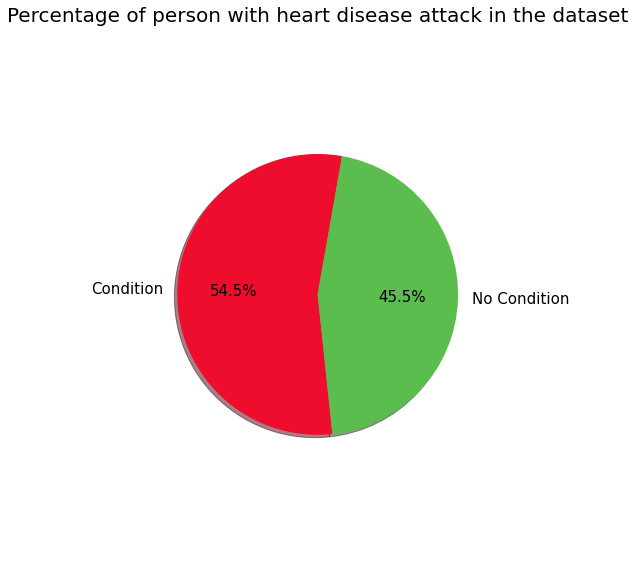

In [13]:
%matplotlib inline
from collections import Counter
heart = Counter(df['output'])
count = [ v for v in heart.values()]
classes = [ 'Condition', 'No Condition']

colors = ['#EF0D2E','#5ABD4E']
fig,ax = plt.subplots()
plt.pie(
    count,
    labels = classes,
    startangle = 80,
    autopct = '%1.1f%%',
    shadow = True,
    colors = colors,
    textprops = {'fontsize': 15})
plt.axis('equal')
plt.tight_layout()
fig.set_size_inches(8,8)
plt.title("Percentage of person with heart disease attack in the dataset", 
    fontdict = {'fontsize':20, 'fontweight': 32} 
    )
plt.show()

<AxesSubplot:>

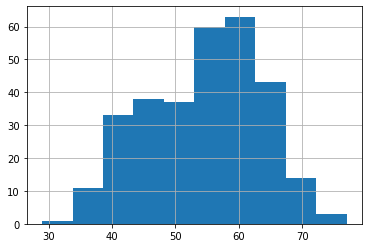

In [2]:
df['age'].hist(bins=10)


The average age of the respondents is 50-60 

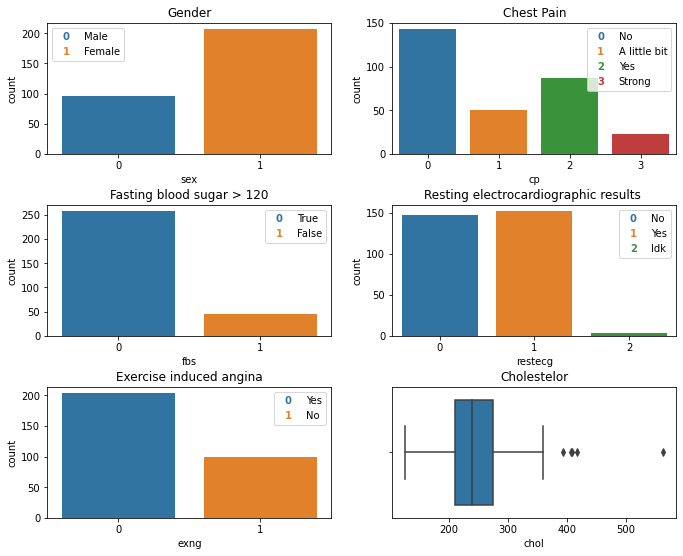

In [14]:
%matplotlib inline

fig, ax = plt.subplots(3,2)
fig.set_size_inches(10,8)
plt.tight_layout(pad=3.0)


generate_countplot(ax[0][0],df['sex'],'Gender',['Male','Female'])
generate_countplot(ax[0][1],df['cp'],'Chest Pain', labels=['No','A little bit','Yes','Strong'])
generate_countplot(ax[1][0],df['fbs'],'Fasting blood sugar > 120', labels=['True','False'])
generate_countplot(ax[1][1], df['restecg'], 'Resting electrocardiographic results ', labels=['No',"Yes", 'Idk'])
generate_countplot(ax[2][0], df['exng'], 'Exercise induced angina', labels=['Yes','No'])
sns.boxplot(data=df, x='chol', ax=ax[2][1])
ax[2][1].set_title('Cholestelor')

plt.show()


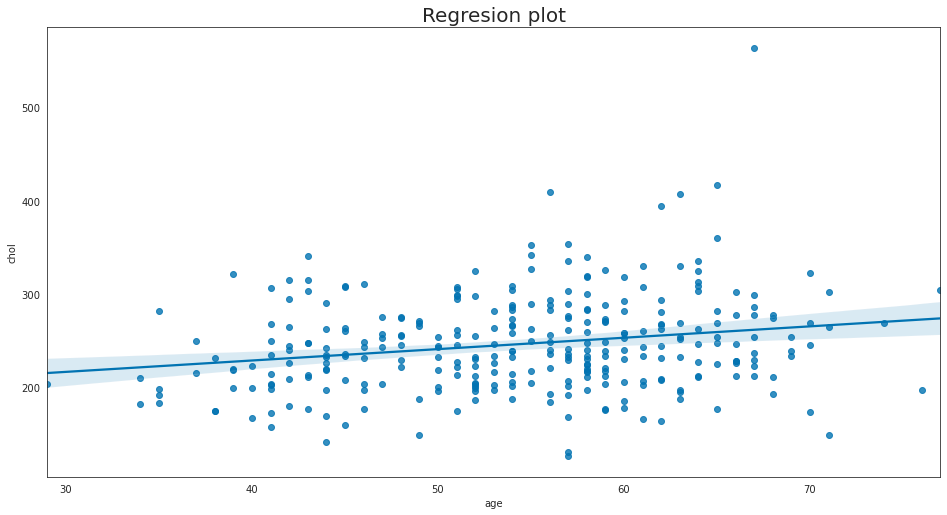

In [112]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(16, 8.27)

g =  sns.regplot(data=df, x='age', y='chol')
sns.set_palette('colorblind6')
sns.set_style('white')
ax.set_title("Regresion plot",fontsize=20)

plt.show()


In [16]:
df['age'].corr(df['chol'])

0.2136779565595618

/home/szymon/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol', ylabel='Count'>

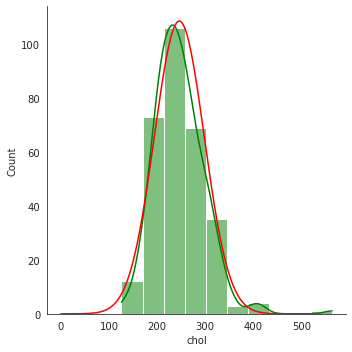

In [18]:
import numpy as np
from scipy.stats import norm
m = df['chol'].mean()
std = df['chol'].std()

x = np.arange(0,500)
sns.displot(data=df, x='chol', color='g', bins=10, kde=True)
sns.lineplot(x, 10.9**4*norm.pdf(x,m,std), color='r')


<AxesSubplot:>

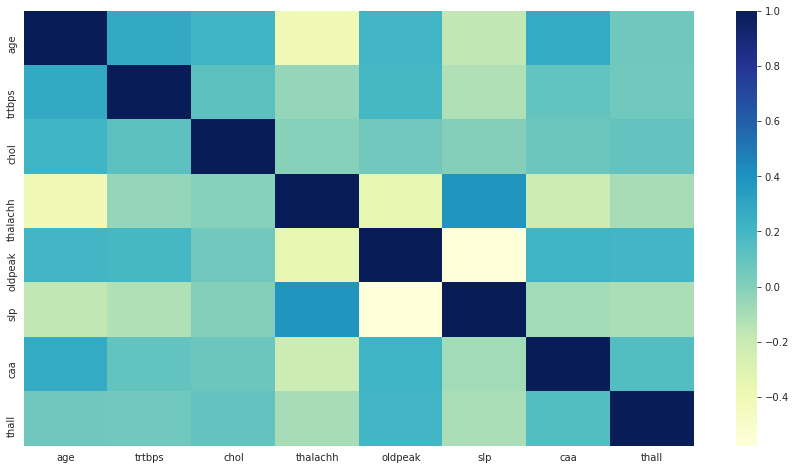

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap="YlGnBu")

There is not much correlation between variables

Variable's distributions

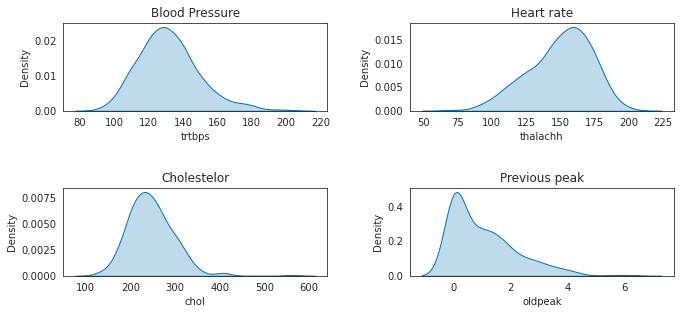

In [102]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(10,5)
sns.kdeplot(data=df, x='trtbps', ax=ax[0][0],shade=True)
sns.kdeplot(data=df, x='chol', ax=ax[1][0], shade=True)
sns.kdeplot(data=df, x='thalachh', ax=ax[0][1], shade=True)
sns.kdeplot(data=df, x='oldpeak', ax=ax[1][1], shade=True)
ax[0][0].set_title('Blood Pressure')
ax[0][1].set_title('Heart rate')
ax[1][0].set_title('Cholestelor')
ax[1][1].set_title('Previous peak')
plt.tight_layout(pad=3.0)


In [20]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Figure size 1080x576 with 0 Axes>

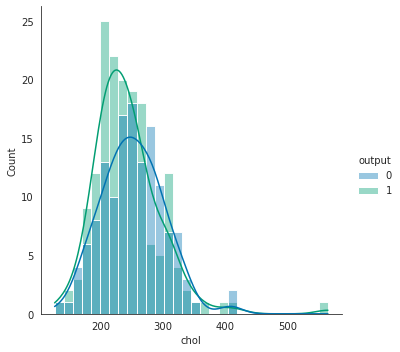

In [55]:
plt.figure(figsize=(15,8))
sns.displot(data=df, x='chol', hue='output', kde=True, bins=30, alpha=0.4)


There is no corelation between cholesterol and heart desease

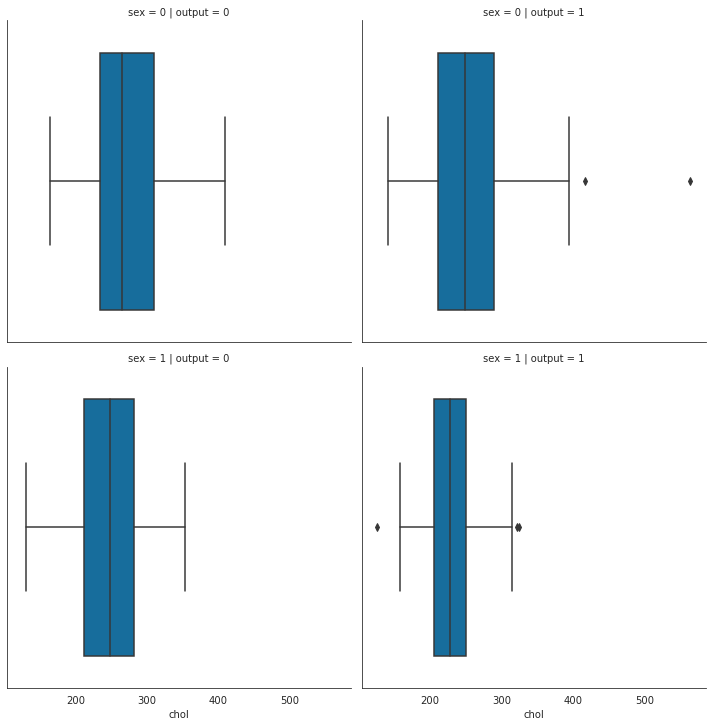

In [67]:
sns.catplot(data=df, x='chol', row='sex',col='output', kind='box')

As we can see cholesterol is almost the same famales and males also does not depend on heart disease


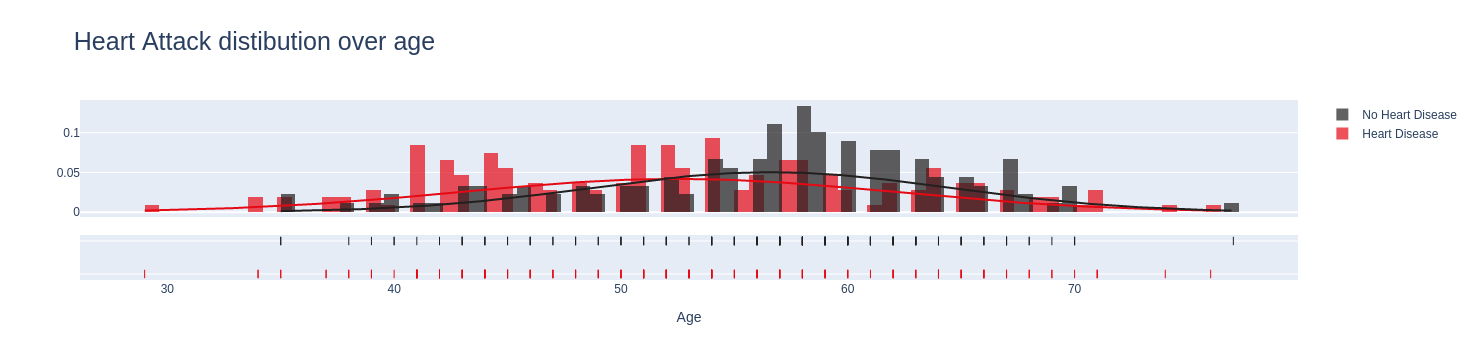

In [99]:
import plotly.express as px
import plotly.figure_factory as ff
heart = df[df['output'] == 1]['age']
heart_no = df[df['output'] == 0]['age']
fig = ff.create_distplot([heart, heart_no],
                        ['Heart Disease', 'No Heart Disease'],
                        bin_size=0.65, curve_type='normal',
                        colors=['#E50914','#221F1F'],
                        )

fig.update_layout(
    title="Heart Attack distibution over age",
    xaxis_title="Age",
    width=1000,
    titlefont=dict(size=25),
    
)
fig.show()

People beetwen 40-55 years old are more susceptible to heart disease

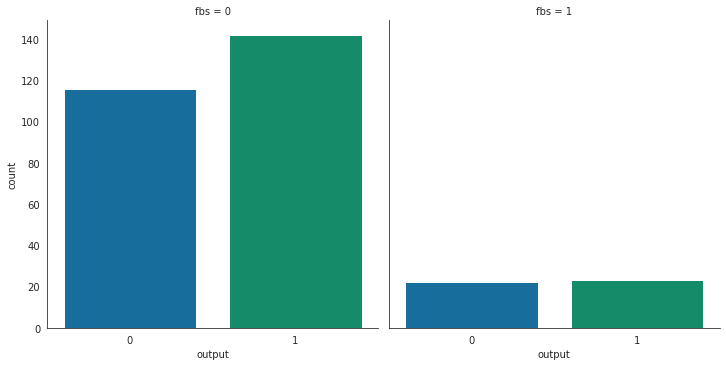

In [124]:

sns.catplot(data=df, x='output', col='fbs', kind='count')


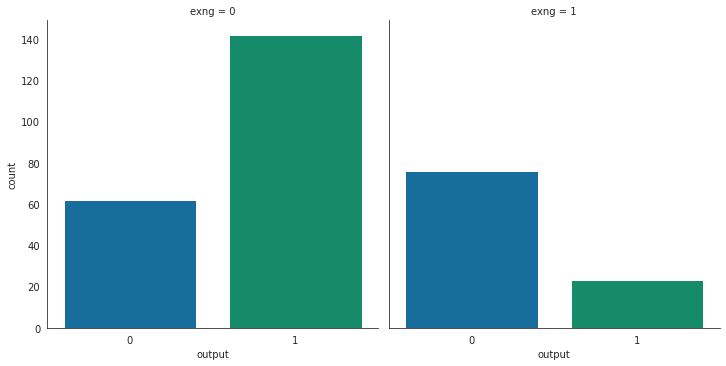

In [125]:
sns.catplot(data=df, x='output', col='exng', kind='count')

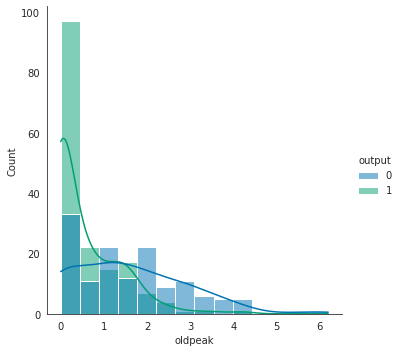

In [127]:
sns.displot(data=df, x='oldpeak', hue='output', kde=True)